In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import pickle #모델 저장을 위한 모듈
from imblearn.over_sampling import SMOTE # upsampling을 위한 모듈
import winsound

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import xgboost
from xgboost import XGBClassifier 
from lightgbm import LGBMClassifier

from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, BaggingClassifier, GradientBoostingClassifier, VotingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, RidgeCV, RidgeClassifier,RidgeClassifierCV
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, GridSearchCV, RandomizedSearchCV

import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, confusion_matrix


In [2]:
df = pd.read_csv("./train.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 76 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   int_rate                    100000 non-null  float64
 1   annual_inc                  100000 non-null  float64
 2   dti                         100000 non-null  float64
 3   delinq_2yrs                 100000 non-null  int64  
 4   inq_last_6mths              100000 non-null  int64  
 5   pub_rec                     100000 non-null  int64  
 6   revol_bal                   100000 non-null  int64  
 7   total_acc                   100000 non-null  int64  
 8   collections_12_mths_ex_med  100000 non-null  int64  
 9   acc_now_delinq              100000 non-null  int64  
 10  tot_coll_amt                100000 non-null  int64  
 11  tot_cur_bal                 100000 non-null  int64  
 12  chargeoff_within_12_mths    100000 non-null  int64  
 13  delinq_amnt    

In [3]:
df.describe()

,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,pub_rec,revol_bal,total_acc,collections_12_mths_ex_med,acc_now_delinq,...,term1,open_acc,installment,revol_util,out_prncp,out_prncp_inv,total_rec_int,fico_range_low,fico_range_high,depvar
count,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.130833,7.436061e+04,18.514508,0.343700,0.668880,0.235720,16090.202820,24.675910,0.018810,0.005800,...,0.855920,11.620700,434.077648,0.537233,0.253327,0.253259,2491.282802,692.630550,696.630660,0.325690
std,0.044773,7.467409e+04,8.413049,0.905007,0.952044,0.661468,21569.939271,11.883834,0.150321,0.083585,...,0.351173,5.458774,265.921746,0.239373,18.053290,18.051746,2706.262200,29.668017,29.668584,0.468634
min,0.053200,5.360000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,...,0.000000,1.000000,23.360000,0.000000,0.000000,0.000000,0.000000,660.000000,664.000000,0.000000
25%,0.097500,4.500000e+04,12.200000,0.000000,0.000000,0.000000,6009.000000,16.000000,0.000000,0.000000,...,1.000000,8.000000,240.292500,0.361000,0.000000,0.000000,857.292500,670.000000,674.000000,0.000000
50%,0.127400,6.200000e+04,18.060000,0.000000,0.000000,0.000000,11030.500000,23.000000,0.000000,0.000000,...,1.000000,11.000000,366.370000,0.541000,0.000000,0.000000,1615.160000,685.000000,689.000000,0.000000
75%,0.158000,9.000000e+04,24.530000,0.000000,1.000000,0.000000,19540.000000,31.000000,0.000000,0.000000,...,1.000000,14.000000,575.860000,0.720000,0.000000,0.000000,3039.115000,705.000000,709.000000,1.000000
max,0.309900,8.300000e+06,49.930000,20.000000,6.000000,63.000000,971736.000000,176.000000,5.000000,6.000000,...,1.000000,82.000000,1584.900000,8.923000,2330.970000,2330.970000,28005.960000,845.000000,850.000000,1.000000


In [4]:
# Target의 var비율을 맞추기 위해 Upsampling 적용
df['depvar'].value_counts()

0    67431
1    32569
Name: depvar, dtype: int64

In [5]:
X = df.drop('depvar',axis=1)
y = df.depvar

## Data split

In [6]:
X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size=0.2,random_state=1001)

## SMOTE Upsampling

In [7]:
smote = SMOTE(sampling_strategy='minority',random_state=1001)

overed_X, overed_y = smote.fit_resample(X_train,y_train)
overed_y.value_counts(normalize=True)

0    0.5
1    0.5
Name: depvar, dtype: float64

## Data standardzation

In [8]:
#표준화가 필요한 컬럼들
to_norm = ['int_rate', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'pub_rec', 'revol_bal', 'total_acc', 'collections_12_mths_ex_med',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal',
       'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens', 'funded_amnt', 'funded_amnt_inv',
       'total_rec_late_fee', 'term1', 'open_acc', 'installment', 'revol_util',
       'out_prncp', 'out_prncp_inv', 'total_rec_int', 'fico_range_low',
       'fico_range_high']

In [9]:
# 정규분포를 이용한 normalization 함수
def data_normalize(df):
    result = df.copy()
    for feature_name in to_norm:
        avg = df[feature_name].mean()
        std = df[feature_name].std()
        result[feature_name] = (df[feature_name] - avg) / std
    return result

In [10]:
overed_X = data_normalize(overed_X)
X_valid = data_normalize(X_valid)
X_train = data_normalize(X_train)

In [11]:
# split된 data셋의 target var 비율 분석.
print(f"원본 데이터 target의 비율 : {df.depvar.sum()/len(df)}")
print(f"oversampled_train 데이터 target의 비율 : {overed_y.sum()/len(overed_y)}")
print(f"validation 데이터 target의 비율 : {y_valid.sum()/len(y_valid)}")

원본 데이터 target의 비율 : 0.32569
oversampled_train 데이터 target의 비율 : 0.5
validation 데이터 target의 비율 : 0.3258


## 시간 체크함수, 모델 평가함수 정의

In [11]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [12]:
def get_clf_eval(y_actual, y_pred):
    accuracy = accuracy_score(y_actual, y_pred)
    precision = precision_score(y_actual, y_pred)
    recall = recall_score(y_actual, y_pred)
    AUC = roc_auc_score(y_actual, y_pred)
    F1 = f1_score(y_actual, y_pred)
    print('\n정확도: {:.4f}'.format(accuracy))
    print('정밀도: {:.4f}'.format(precision))
    print('재현율: {:.4f}'.format(recall))
    print('AUC: {:.4f}'.format(AUC))
    print('F1: {:.4f}'.format(F1))
    
    sns.heatmap(confusion_matrix(y_actual, y_pred), annot=True, fmt='d', cmap='YlGnBu')

In [13]:
# threshold tuning 함수
def Threshold_tuing(model):
    # Threshold조정
    y_pred_prob = model.predict_proba(X_valid)
    f1_by_threshold={}
    for i in np.arange(0.1,0.5,0.01):
        f1_by_threshold[i] = f1_score(y_valid,y_pred_prob[:,1]>i)
    plt.plot(f1_by_threshold.keys(),f1_by_threshold.values())
    plt.title("F1_score by Threshold",fontsize=15)
    plt.grid(True)
    plt.show()
    print(sorted(list(f1_by_threshold.items()),key=lambda x:x[1],reverse=True)[0])

# 1. XGboost기법

##### Normalized Train 데이터를 가지고 xgboost학습

In [15]:
with open('./저장모델/xgboost_model.pkl','rb') as f:
    normed_xgb = pickle.load(f)

In [80]:
xgb = xgboost.XGBClassifier(use_label_encoder=False,objective='binary:logistic',tree_method='gpu_hist',
                           predictor='gpu_predictor',eval_metric='mlogloss')
param_grid = {
    'learning_rate':[0.01,0.3,0.5,0.8],
    'gamma':[0,1,2],
    'max_depth': [3,5,7],
    'min_child_weight':[0,1,2],
    'subsample': [0.5,1],
    'colsample_bytree':[0.5,1],
    "n_estimators":[100,300]
             }
# train data를 2번 반복을 통한 5fold로 총 10개의 fold를 생성.
cv=RepeatedStratifiedKFold(n_splits=5, n_repeats=2)


# 각 파라미터를 그리드로 만들어서 주어진 파라미터를 넣고 fit한뒤 cv를 통한 f1스코어로 그리드 파라미터중에서 최고의 파라미터 조합을 찾는다.
grid_search = RandomizedSearchCV(estimator=xgb,
                          param_distributions=param_grid,
                          cv= cv,
                          error_score=0,
                          scoring='f1',verbose=1,n_iter=100)
start_time = timer(None)
result = grid_search.fit(data_normalize(X_train),y_train)
timer(start_time)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits

 Time taken: 0 hours 43 minutes and 50.52 seconds.


{'subsample': 1, 'n_estimators': 300, 'min_child_weight': 2, 'max_depth': 5, 'learning_rate': 0.3, 'gamma': 0, 'colsample_bytree': 1}

정확도: 0.7450
정밀도: 0.6410
재현율: 0.4943
AUC: 0.6803
F1: 0.5582


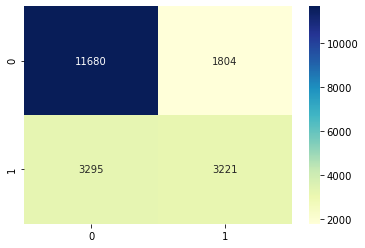

In [82]:
print(result.best_params_)
normed_xgb = result.best_estimator_
normed_xgb.fit(data_normalize(X_train),y_train)
y_pred_xgb = normed_xgb.predict(X_valid)
get_clf_eval(y_valid, y_pred_xgb)

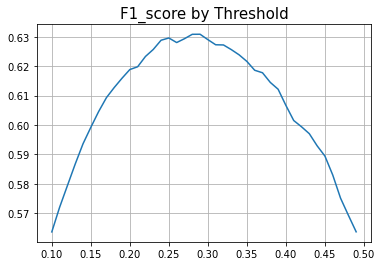

(0.2899999999999999, 0.6308602639963586)


In [218]:
Threshold_tuing(normed_xgb)

In [85]:
with open('./저장모델/xgboost_model.pkl','wb') as file:
    pickle.dump(normed_xgb, file)

# 2. C Suppiort vector machine

In [ ]:
c = [0.1,1,3,5,7,9,10,11,12,13]
precision =[]
recall=[]
f1 = []
for i in [0.1,1,3,5,7,9,10,11,12,13]:
    svm = SVC(C=i)
    svm.fit(overed_X,overed_y)
    svm_pred = svm.predict(X_valid)
    precision.append(precision_score(y_valid,svm_pred))
    recall.append(recall_score(y_valid,svm_pred))
    f1.append(f1_score(y_valid,svm_pred))
    if f1_score(y_valid,svm_pred)<=f1[-1]:
        break
    

In [55]:
# 각 C값에 대한 정확도 정밀도 f1스코어
c= [0.1,1,3,5,7,9,10,11,12,13]
precision =[0,0.6485,0.6317,0.6232,0.6162,0.6109,0.6085,0.6075,0.6053,0.6018]
recall= [0,0.4598,0.4975,0.5130,0.5219,0.5279,0.5313,0.5330,0.5350,0.5374]
f1=[0,0.5381,0.5567,0.5628,0.5652,0.5664,0.5673,0.5678,0.5680,0.5678]

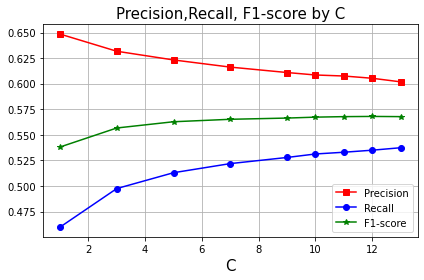

In [54]:
# C 에따른 정밀도 재현율 f1스코어 그래프
plt.grid(True)
plt.xlabel('C',fontsize=15)
plt.title('Precision,Recall, F1-score by C',fontsize=15)
prec_plt = plt.plot(c[1:],precision[1:],color = 'r',marker='s',label='Precision')
ecall_plt = plt.plot(c[1:],recall[1:],color='b',marker='o',label='Recall')
f1_plt = plt.plot(c[1:],f1[1:],color='g',marker='*',label='F1-score')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
best_svm = SVC(C=12,probability=True)
best_svm.fit(overed_X,overed_y)

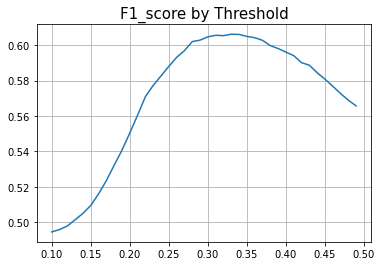

(0.32999999999999985, 0.6062588174939079)


In [237]:
Threshold_tuing(best_svm)

In [40]:
with open('./저장모델/bset_svm.pkl','wb') as file:
    pickle.dump(best_svm,file)

In [16]:
with open('./저장모델/bset_svm.pkl','rb') as f:
    best_svm = pickle.load(f)

# 3. DNN - full connected network

In [14]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.nn.functional import softmax,sigmoid
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

In [62]:
torch.manual_seed(31)

In [15]:
class NN_dataset(Dataset):
    
    def __init__(self,X_data,y_data):
        self.X_data = X_data
        self.y_data = y_data
        
    def __getitem__(self,index):
        return self.X_data[index], self.y_data[index]
    
    def __len__(self):
        return len(self.X_data)

In [81]:
NN_train = NN_dataset(torch.FloatTensor(X_train.to_numpy()),torch.FloatTensor(y_train.to_numpy()))
NN_valid = NN_dataset(torch.FloatTensor(X_valid.to_numpy()),torch.FloatTensor(y_valid.to_numpy()))
NN_train_overed = NN_dataset(torch.FloatTensor(overed_X.to_numpy()),torch.FloatTensor(overed_y.to_numpy()))

In [63]:
# validation결과를 보면서 Batchnorm과 Dropout layer추가
class NN_binary(nn.Module):
    def __init__(self,num_features,num_classes):
        super(NN_binary,self).__init__()
        
        self.Layer = nn.Sequential(
            nn.Linear(num_features,1024),
            nn.BatchNorm1d(1024),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(1024,1024),
            nn.BatchNorm1d(1024),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(1024,1024),
            nn.BatchNorm1d(1024),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(1024,512),
            nn.BatchNorm1d(512),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(512,256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256,256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Linear(256,128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(128,64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            #nn.Dropout(0.5),
            nn.Linear(64,num_classes)
            
        )
    def forward(self,x):
        x = self.Layer(x)
        x = torch.sigmoid(x)
        return x

In [83]:
EPOCHS = 30
BATCH_SIZE = 128

train_loader = DataLoader(dataset=NN_train, batch_size=BATCH_SIZE, shuffle=True)
train_loader_overed = DataLoader(dataset=NN_train_overed,batch_size=BATCH_SIZE,shuffle=True)
test_loader = DataLoader(dataset=NN_valid, batch_size=32, shuffle=False)
model = NN_binary(num_features=len(X_train.columns),num_classes=1).cuda()
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(),lr=0.01)

In [65]:
def show_Network_perform(train_loss,train_f1,val_loss,val_f1):
    plt.grid(True)
    tl = plt.plot(range(EPOCHS),train_loss,color='r',label ="Train_Loss")
    tf = plt.plot(range(EPOCHS),train_f1,color='b',label="Train_F1")
    vl = plt.plot(range(EPOCHS),val_loss,color='y',label='Valid_Loss')
    vf = plt.plot(range(EPOCHS),val_f1,color='g',label='Valid_F1')
    with open('./저장모델/딥러닝 모델/모델성능.txt','a') as file:
        file.write(f'노말6번성능-{max(val_f1):.4f}'+'\n')
        
    print("Max Val F1 score: [{}]".format(max(val_f1)))
    plt.legend()
    plt.show()

In [66]:
def train(train_loader,test_loader,threshold=0.5,normal=True):
    model.cuda()
    threshold = torch.tensor([threshold]).cuda()
    starttime =timer(None)
    # ealry stop을 위한 best값 저장
    best_val_loss = 100
    best_val_f1 = 0
    cnt = 0
    for epoch in range(EPOCHS):
        model.train()
        train_epoch_f1 = 0
        train_epoch_loss=0
                        
        # Training
        for i,(X_batch,y_batch) in enumerate(train_loader):
            X_batch = X_batch.cuda()
            y_batch = y_batch.cuda()

            y_output = model(X_batch).view(-1)
            loss = criterion(y_output,y_batch)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            # Predict값 계산해서 f1-score계산
            #y_pred = torch.max(y_output,1)[1] --> CEloss에서 마지막에 softmax없이 최고갑을 뽑아낸다
            #y_pred = (y_output[:,1]>=threshold).int()*1 --> CEloss에서 마지막 softmax후
            y_pred = (y_output>=threshold).int()*1 # BCE에서 sigmoid후에 값으 계산
            
            batch_f1 = f1_score(y_batch.data.cpu(),y_pred.cpu())
            train_epoch_f1 += batch_f1
            train_epoch_loss += loss.item()
        # 1 Epoch을 통해 만들어진 파라미터를 이용한 validation시행
        with torch.no_grad():
            val_epoch_loss = 0
            val_epoch_f1 = 0
            model.eval()
            for X_val_batch,y_val_valid in test_loader:
                X_val_batch = X_val_batch.cuda()
                y_val_valid = y_val_valid.cuda()

                y_val_ouput = model(X_val_batch).view(-1)
                #y_val_pred = torch.max(y_val_ouput,1)[1]
                #y_val_pred = (y_val_ouput[:,1]>=threshold).int()*1
                y_val_pred = (y_val_ouput>=threshold).int()*1

                val_loss = criterion(y_val_ouput,y_val_valid)
                val_epoch_loss +=val_loss.item()
                val_f1 = f1_score(y_val_valid.data.cpu(),y_val_pred.cpu())
                val_epoch_f1 +=val_f1
        # valid한 결과 loss가 이전 에폭 valid loss보다 떨어졌으면 모델을 저장힌다.
        if val_epoch_f1/len(test_loader)>=best_val_f1:
            #best_val_loss = val_epoch_loss/len(test_loader)
            best_val_f1 =val_epoch_f1/len(test_loader)
            if normal:
                torch.save(model,f'./best_loss_model7_normal.pt')
            else:
                torch.save(model,f'./best_loss_model9_overed.pt')
        train_loss.append(train_epoch_loss/len(train_loader))
        train_f1_list.append(train_epoch_f1/len(train_loader))
        val_loss_list.append(val_epoch_loss/len(test_loader))
        val_f1_list.append(val_epoch_f1/len(test_loader))
        if (epoch+1)%1==0:
            print(
                'Epoch [{}/{}] Step [{}/{}] Train_Loss: [{:.4f}] Train F1-score: [{:.4f}] Val_Loss: [{:.4f}] Val_F1: [{:.4f}]'\
                .format(epoch+1, EPOCHS,i+1, len(train_loader),train_epoch_loss/len(train_loader),train_epoch_f1/len(train_loader),val_epoch_loss/len(test_loader),val_epoch_f1/len(test_loader)))
            timer(starttime)
            starttime =timer(None)

Epoch [1/30] Step [843/843] Train_Loss: [0.4371] Train F1-score: [0.7673] Val_Loss: [0.5347] Val_F1: [0.5902]

 Time taken: 0 hours 0 minutes and 10.02 seconds.
Epoch [2/30] Step [843/843] Train_Loss: [0.4080] Train F1-score: [0.7853] Val_Loss: [0.5250] Val_F1: [0.6052]

 Time taken: 0 hours 0 minutes and 10.0 seconds.
Epoch [3/30] Step [843/843] Train_Loss: [0.4027] Train F1-score: [0.7887] Val_Loss: [0.5484] Val_F1: [0.5878]

 Time taken: 0 hours 0 minutes and 10.07 seconds.
Epoch [4/30] Step [843/843] Train_Loss: [0.3972] Train F1-score: [0.7905] Val_Loss: [0.5168] Val_F1: [0.6136]

 Time taken: 0 hours 0 minutes and 9.97 seconds.
Epoch [5/30] Step [843/843] Train_Loss: [0.3938] Train F1-score: [0.7928] Val_Loss: [0.5205] Val_F1: [0.6083]

 Time taken: 0 hours 0 minutes and 9.96 seconds.
Epoch [6/30] Step [843/843] Train_Loss: [0.3909] Train F1-score: [0.7954] Val_Loss: [0.5126] Val_F1: [0.6119]

 Time taken: 0 hours 0 minutes and 9.9 seconds.
Epoch [7/30] Step [843/843] Train_Loss:

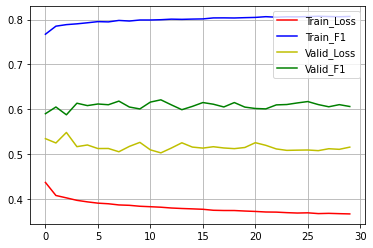

In [84]:
normal = False
train_loss = []
val_loss_list=[]
train_f1_list = []
val_f1_list=[]
if normal:
    sttime=timer(None)
    train(train_loader,test_loader,threshold=0.3)
    timer(sttime)
else:
    sttime=timer(None)
    train(train_loader_overed,test_loader,threshold=0.3,normal=False)
    timer(sttime)
show_Network_perform(train_loss,train_f1_list,val_loss_list,val_f1_list)

In [85]:
with open('평균Valf1.txt','a') as f:
    f.write(f'7모델평균성능-{np.mean(val_f1_list):.4f}    7번모델최고성능-{max(val_f1_list):.4f}\n')
print(np.mean(val_f1_list))

0.6081172277593558


In [86]:
with torch.no_grad():
    model.cpu()
    model.eval()
    mlp_pred_proba = model(torch.FloatTensor(X_valid.to_numpy())).view(-1)
for thres in [0.3,.4,.5,.6,.7]:
    mlp_pred = (mlp_pred_proba>thres).int()
    print(confusion_matrix(y_valid,mlp_pred),f1_score(y_valid,mlp_pred))

[[7034 6450]
 [ 778 5738]] 0.6135585970915313
[[9262 4222]
 [1505 5011]] 0.6363578639913644
[[10598  2886]
 [ 2245  4271]] 0.6247348789585314
[[11922  1562]
 [ 3378  3138]] 0.5595577746077033
[[12964   520]
 [ 4837  1679]] 0.3853126792885829


In [95]:
make_mlp2_sub(model,.5)

In [92]:
model_best = torch.load('./best_loss_model9_overed.pt').cuda()

In [77]:
with torch.no_grad():
    model_best.cpu()
    model_best.eval()
    mlp_pred_proba = model_best(torch.FloatTensor(X_valid.to_numpy())).view(-1)
for thres in [0.3,.4,.5,.6,.7]:
    mlp_pred = (mlp_pred_proba>thres).int()
    print(confusion_matrix(y_valid,mlp_pred),f1_score(y_valid,mlp_pred))

[[9258 4226]
 [1453 5063]] 0.6406833280607402
[[10595  2889]
 [ 2212  4304]] 0.6279086731344372
[[11763  1721]
 [ 3155  3361]] 0.5795826866701155
[[12686   798]
 [ 4300  2216]] 0.46505771248688355
[[13163   321]
 [ 5126  1390]] 0.3379117539807949


In [93]:
make_mlp2_sub(model_best)

# lgbm Classifier

In [380]:
lgbm = LGBMClassifier(objective='binary')
lgbm_params = {
    'learning_rate':[0.01,0.05,0.1,0.3,0.5],
    'n_estimators':[100,200,300,400],
    'max_depth':[3,5,7],
    'min_child_samples':[20,25,30],
    'subsample':[0.5,0.6,0.7],
    'colsample_bytree':[0.5,0.5,1],
    'metric':['binary_logloss','cross_entropy']
}
cv=RepeatedStratifiedKFold(n_splits=5, n_repeats=2)
grid_search = RandomizedSearchCV(estimator=lgbm,
                          param_distributions=lgbm_params,
                          cv= cv,
                          error_score=0,
                          scoring='f1',verbose=3,n_iter=100,random_state=1001)
start_time = timer(None)
result = grid_search.fit(X_train,y_train)
timer(start_time)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[CV 1/10] END colsample_bytree=0.5, learning_rate=0.3, max_depth=3, metric=binary_logloss, min_child_samples=30, n_estimators=200, subsample=0.6;, score=0.551 total time=   0.3s
[CV 2/10] END colsample_bytree=0.5, learning_rate=0.3, max_depth=3, metric=binary_logloss, min_child_samples=30, n_estimators=200, subsample=0.6;, score=0.552 total time=   0.3s
[CV 3/10] END colsample_bytree=0.5, learning_rate=0.3, max_depth=3, metric=binary_logloss, min_child_samples=30, n_estimators=200, subsample=0.6;, score=0.548 total time=   0.3s
[CV 4/10] END colsample_bytree=0.5, learning_rate=0.3, max_depth=3, metric=binary_logloss, min_child_samples=30, n_estimators=200, subsample=0.6;, score=0.559 total time=   0.3s
[CV 5/10] END colsample_bytree=0.5, learning_rate=0.3, max_depth=3, metric=binary_logloss, min_child_samples=30, n_estimators=200, subsample=0.6;, score=0.543 total time=   0.3s
[CV 6/10] END colsample_bytree=0.5, learning_

[CV 7/10] END colsample_bytree=1, learning_rate=0.1, max_depth=3, metric=binary_logloss, min_child_samples=20, n_estimators=400, subsample=0.6;, score=0.548 total time=   0.4s
[CV 8/10] END colsample_bytree=1, learning_rate=0.1, max_depth=3, metric=binary_logloss, min_child_samples=20, n_estimators=400, subsample=0.6;, score=0.540 total time=   0.4s
[CV 9/10] END colsample_bytree=1, learning_rate=0.1, max_depth=3, metric=binary_logloss, min_child_samples=20, n_estimators=400, subsample=0.6;, score=0.542 total time=   0.4s
[CV 10/10] END colsample_bytree=1, learning_rate=0.1, max_depth=3, metric=binary_logloss, min_child_samples=20, n_estimators=400, subsample=0.6;, score=0.551 total time=   0.4s
[CV 1/10] END colsample_bytree=0.5, learning_rate=0.1, max_depth=5, metric=cross_entropy, min_child_samples=20, n_estimators=300, subsample=0.7;, score=0.554 total time=   0.5s
[CV 2/10] END colsample_bytree=0.5, learning_rate=0.1, max_depth=5, metric=cross_entropy, min_child_samples=20, n_esti

[CV 4/10] END colsample_bytree=0.5, learning_rate=0.1, max_depth=7, metric=binary_logloss, min_child_samples=20, n_estimators=400, subsample=0.6;, score=0.565 total time=   0.6s
[CV 5/10] END colsample_bytree=0.5, learning_rate=0.1, max_depth=7, metric=binary_logloss, min_child_samples=20, n_estimators=400, subsample=0.6;, score=0.555 total time=   0.7s
[CV 6/10] END colsample_bytree=0.5, learning_rate=0.1, max_depth=7, metric=binary_logloss, min_child_samples=20, n_estimators=400, subsample=0.6;, score=0.556 total time=   0.7s
[CV 7/10] END colsample_bytree=0.5, learning_rate=0.1, max_depth=7, metric=binary_logloss, min_child_samples=20, n_estimators=400, subsample=0.6;, score=0.562 total time=   0.7s
[CV 8/10] END colsample_bytree=0.5, learning_rate=0.1, max_depth=7, metric=binary_logloss, min_child_samples=20, n_estimators=400, subsample=0.6;, score=0.565 total time=   0.6s
[CV 9/10] END colsample_bytree=0.5, learning_rate=0.1, max_depth=7, metric=binary_logloss, min_child_samples=2

[CV 1/10] END colsample_bytree=1, learning_rate=0.1, max_depth=5, metric=binary_logloss, min_child_samples=20, n_estimators=200, subsample=0.6;, score=0.557 total time=   0.3s
[CV 2/10] END colsample_bytree=1, learning_rate=0.1, max_depth=5, metric=binary_logloss, min_child_samples=20, n_estimators=200, subsample=0.6;, score=0.557 total time=   0.4s
[CV 3/10] END colsample_bytree=1, learning_rate=0.1, max_depth=5, metric=binary_logloss, min_child_samples=20, n_estimators=200, subsample=0.6;, score=0.548 total time=   0.4s
[CV 4/10] END colsample_bytree=1, learning_rate=0.1, max_depth=5, metric=binary_logloss, min_child_samples=20, n_estimators=200, subsample=0.6;, score=0.562 total time=   0.4s
[CV 5/10] END colsample_bytree=1, learning_rate=0.1, max_depth=5, metric=binary_logloss, min_child_samples=20, n_estimators=200, subsample=0.6;, score=0.549 total time=   0.3s
[CV 6/10] END colsample_bytree=1, learning_rate=0.1, max_depth=5, metric=binary_logloss, min_child_samples=20, n_estimat

[CV 8/10] END colsample_bytree=0.5, learning_rate=0.05, max_depth=7, metric=binary_logloss, min_child_samples=20, n_estimators=400, subsample=0.6;, score=0.558 total time=   0.8s
[CV 9/10] END colsample_bytree=0.5, learning_rate=0.05, max_depth=7, metric=binary_logloss, min_child_samples=20, n_estimators=400, subsample=0.6;, score=0.554 total time=   0.7s
[CV 10/10] END colsample_bytree=0.5, learning_rate=0.05, max_depth=7, metric=binary_logloss, min_child_samples=20, n_estimators=400, subsample=0.6;, score=0.562 total time=   0.7s
[CV 1/10] END colsample_bytree=0.5, learning_rate=0.5, max_depth=5, metric=cross_entropy, min_child_samples=30, n_estimators=300, subsample=0.7;, score=0.557 total time=   0.5s
[CV 2/10] END colsample_bytree=0.5, learning_rate=0.5, max_depth=5, metric=cross_entropy, min_child_samples=30, n_estimators=300, subsample=0.7;, score=0.557 total time=   0.5s
[CV 3/10] END colsample_bytree=0.5, learning_rate=0.5, max_depth=5, metric=cross_entropy, min_child_samples=

[CV 5/10] END colsample_bytree=0.5, learning_rate=0.01, max_depth=7, metric=binary_logloss, min_child_samples=25, n_estimators=400, subsample=0.7;, score=0.467 total time=   0.8s
[CV 6/10] END colsample_bytree=0.5, learning_rate=0.01, max_depth=7, metric=binary_logloss, min_child_samples=25, n_estimators=400, subsample=0.7;, score=0.476 total time=   0.8s
[CV 7/10] END colsample_bytree=0.5, learning_rate=0.01, max_depth=7, metric=binary_logloss, min_child_samples=25, n_estimators=400, subsample=0.7;, score=0.476 total time=   0.9s
[CV 8/10] END colsample_bytree=0.5, learning_rate=0.01, max_depth=7, metric=binary_logloss, min_child_samples=25, n_estimators=400, subsample=0.7;, score=0.482 total time=   0.8s
[CV 9/10] END colsample_bytree=0.5, learning_rate=0.01, max_depth=7, metric=binary_logloss, min_child_samples=25, n_estimators=400, subsample=0.7;, score=0.487 total time=   0.9s
[CV 10/10] END colsample_bytree=0.5, learning_rate=0.01, max_depth=7, metric=binary_logloss, min_child_sa

[CV 2/10] END colsample_bytree=1, learning_rate=0.5, max_depth=7, metric=cross_entropy, min_child_samples=25, n_estimators=400, subsample=0.5;, score=0.547 total time=   0.6s
[CV 3/10] END colsample_bytree=1, learning_rate=0.5, max_depth=7, metric=cross_entropy, min_child_samples=25, n_estimators=400, subsample=0.5;, score=0.540 total time=   0.6s
[CV 4/10] END colsample_bytree=1, learning_rate=0.5, max_depth=7, metric=cross_entropy, min_child_samples=25, n_estimators=400, subsample=0.5;, score=0.553 total time=   0.6s
[CV 5/10] END colsample_bytree=1, learning_rate=0.5, max_depth=7, metric=cross_entropy, min_child_samples=25, n_estimators=400, subsample=0.5;, score=0.544 total time=   0.6s
[CV 6/10] END colsample_bytree=1, learning_rate=0.5, max_depth=7, metric=cross_entropy, min_child_samples=25, n_estimators=400, subsample=0.5;, score=0.542 total time=   0.6s
[CV 7/10] END colsample_bytree=1, learning_rate=0.5, max_depth=7, metric=cross_entropy, min_child_samples=25, n_estimators=40

[CV 9/10] END colsample_bytree=0.5, learning_rate=0.05, max_depth=5, metric=binary_logloss, min_child_samples=20, n_estimators=200, subsample=0.7;, score=0.525 total time=   0.4s
[CV 10/10] END colsample_bytree=0.5, learning_rate=0.05, max_depth=5, metric=binary_logloss, min_child_samples=20, n_estimators=200, subsample=0.7;, score=0.528 total time=   0.4s
[CV 1/10] END colsample_bytree=0.5, learning_rate=0.05, max_depth=5, metric=cross_entropy, min_child_samples=25, n_estimators=400, subsample=0.6;, score=0.547 total time=   0.7s
[CV 2/10] END colsample_bytree=0.5, learning_rate=0.05, max_depth=5, metric=cross_entropy, min_child_samples=25, n_estimators=400, subsample=0.6;, score=0.552 total time=   0.7s
[CV 3/10] END colsample_bytree=0.5, learning_rate=0.05, max_depth=5, metric=cross_entropy, min_child_samples=25, n_estimators=400, subsample=0.6;, score=0.546 total time=   0.7s
[CV 4/10] END colsample_bytree=0.5, learning_rate=0.05, max_depth=5, metric=cross_entropy, min_child_sample

[CV 6/10] END colsample_bytree=1, learning_rate=0.1, max_depth=5, metric=cross_entropy, min_child_samples=30, n_estimators=100, subsample=0.6;, score=0.530 total time=   0.2s
[CV 7/10] END colsample_bytree=1, learning_rate=0.1, max_depth=5, metric=cross_entropy, min_child_samples=30, n_estimators=100, subsample=0.6;, score=0.540 total time=   0.2s
[CV 8/10] END colsample_bytree=1, learning_rate=0.1, max_depth=5, metric=cross_entropy, min_child_samples=30, n_estimators=100, subsample=0.6;, score=0.530 total time=   0.2s
[CV 9/10] END colsample_bytree=1, learning_rate=0.1, max_depth=5, metric=cross_entropy, min_child_samples=30, n_estimators=100, subsample=0.6;, score=0.529 total time=   0.2s
[CV 10/10] END colsample_bytree=1, learning_rate=0.1, max_depth=5, metric=cross_entropy, min_child_samples=30, n_estimators=100, subsample=0.6;, score=0.539 total time=   0.2s
[CV 1/10] END colsample_bytree=0.5, learning_rate=0.3, max_depth=5, metric=binary_logloss, min_child_samples=25, n_estimator

[CV 3/10] END colsample_bytree=1, learning_rate=0.5, max_depth=5, metric=binary_logloss, min_child_samples=30, n_estimators=200, subsample=0.7;, score=0.560 total time=   0.3s
[CV 4/10] END colsample_bytree=1, learning_rate=0.5, max_depth=5, metric=binary_logloss, min_child_samples=30, n_estimators=200, subsample=0.7;, score=0.558 total time=   0.3s
[CV 5/10] END colsample_bytree=1, learning_rate=0.5, max_depth=5, metric=binary_logloss, min_child_samples=30, n_estimators=200, subsample=0.7;, score=0.559 total time=   0.3s
[CV 6/10] END colsample_bytree=1, learning_rate=0.5, max_depth=5, metric=binary_logloss, min_child_samples=30, n_estimators=200, subsample=0.7;, score=0.557 total time=   0.3s
[CV 7/10] END colsample_bytree=1, learning_rate=0.5, max_depth=5, metric=binary_logloss, min_child_samples=30, n_estimators=200, subsample=0.7;, score=0.557 total time=   0.3s
[CV 8/10] END colsample_bytree=1, learning_rate=0.5, max_depth=5, metric=binary_logloss, min_child_samples=30, n_estimat

[CV 10/10] END colsample_bytree=0.5, learning_rate=0.3, max_depth=5, metric=cross_entropy, min_child_samples=20, n_estimators=200, subsample=0.5;, score=0.565 total time=   0.3s
[CV 1/10] END colsample_bytree=0.5, learning_rate=0.1, max_depth=3, metric=cross_entropy, min_child_samples=30, n_estimators=400, subsample=0.6;, score=0.545 total time=   0.4s
[CV 2/10] END colsample_bytree=0.5, learning_rate=0.1, max_depth=3, metric=cross_entropy, min_child_samples=30, n_estimators=400, subsample=0.6;, score=0.541 total time=   0.4s
[CV 3/10] END colsample_bytree=0.5, learning_rate=0.1, max_depth=3, metric=cross_entropy, min_child_samples=30, n_estimators=400, subsample=0.6;, score=0.534 total time=   0.4s
[CV 4/10] END colsample_bytree=0.5, learning_rate=0.1, max_depth=3, metric=cross_entropy, min_child_samples=30, n_estimators=400, subsample=0.6;, score=0.544 total time=   0.5s
[CV 5/10] END colsample_bytree=0.5, learning_rate=0.1, max_depth=3, metric=cross_entropy, min_child_samples=30, n_

[CV 7/10] END colsample_bytree=0.5, learning_rate=0.05, max_depth=3, metric=cross_entropy, min_child_samples=20, n_estimators=300, subsample=0.7;, score=0.501 total time=   0.4s
[CV 8/10] END colsample_bytree=0.5, learning_rate=0.05, max_depth=3, metric=cross_entropy, min_child_samples=20, n_estimators=300, subsample=0.7;, score=0.497 total time=   0.3s
[CV 9/10] END colsample_bytree=0.5, learning_rate=0.05, max_depth=3, metric=cross_entropy, min_child_samples=20, n_estimators=300, subsample=0.7;, score=0.502 total time=   0.4s
[CV 10/10] END colsample_bytree=0.5, learning_rate=0.05, max_depth=3, metric=cross_entropy, min_child_samples=20, n_estimators=300, subsample=0.7;, score=0.500 total time=   0.4s
[CV 1/10] END colsample_bytree=1, learning_rate=0.05, max_depth=5, metric=binary_logloss, min_child_samples=25, n_estimators=300, subsample=0.7;, score=0.544 total time=   0.5s
[CV 2/10] END colsample_bytree=1, learning_rate=0.05, max_depth=5, metric=binary_logloss, min_child_samples=25

[CV 4/10] END colsample_bytree=0.5, learning_rate=0.5, max_depth=3, metric=cross_entropy, min_child_samples=25, n_estimators=100, subsample=0.6;, score=0.550 total time=   0.2s
[CV 5/10] END colsample_bytree=0.5, learning_rate=0.5, max_depth=3, metric=cross_entropy, min_child_samples=25, n_estimators=100, subsample=0.6;, score=0.537 total time=   0.2s
[CV 6/10] END colsample_bytree=0.5, learning_rate=0.5, max_depth=3, metric=cross_entropy, min_child_samples=25, n_estimators=100, subsample=0.6;, score=0.541 total time=   0.2s
[CV 7/10] END colsample_bytree=0.5, learning_rate=0.5, max_depth=3, metric=cross_entropy, min_child_samples=25, n_estimators=100, subsample=0.6;, score=0.543 total time=   0.2s
[CV 8/10] END colsample_bytree=0.5, learning_rate=0.5, max_depth=3, metric=cross_entropy, min_child_samples=25, n_estimators=100, subsample=0.6;, score=0.550 total time=   0.2s
[CV 9/10] END colsample_bytree=0.5, learning_rate=0.5, max_depth=3, metric=cross_entropy, min_child_samples=25, n_e

[CV 1/10] END colsample_bytree=0.5, learning_rate=0.05, max_depth=3, metric=cross_entropy, min_child_samples=20, n_estimators=400, subsample=0.7;, score=0.513 total time=   0.4s
[CV 2/10] END colsample_bytree=0.5, learning_rate=0.05, max_depth=3, metric=cross_entropy, min_child_samples=20, n_estimators=400, subsample=0.7;, score=0.517 total time=   0.4s
[CV 3/10] END colsample_bytree=0.5, learning_rate=0.05, max_depth=3, metric=cross_entropy, min_child_samples=20, n_estimators=400, subsample=0.7;, score=0.510 total time=   0.5s
[CV 4/10] END colsample_bytree=0.5, learning_rate=0.05, max_depth=3, metric=cross_entropy, min_child_samples=20, n_estimators=400, subsample=0.7;, score=0.521 total time=   0.4s
[CV 5/10] END colsample_bytree=0.5, learning_rate=0.05, max_depth=3, metric=cross_entropy, min_child_samples=20, n_estimators=400, subsample=0.7;, score=0.501 total time=   0.5s
[CV 6/10] END colsample_bytree=0.5, learning_rate=0.05, max_depth=3, metric=cross_entropy, min_child_samples=2

[CV 8/10] END colsample_bytree=1, learning_rate=0.05, max_depth=7, metric=cross_entropy, min_child_samples=30, n_estimators=100, subsample=0.7;, score=0.523 total time=   0.3s
[CV 9/10] END colsample_bytree=1, learning_rate=0.05, max_depth=7, metric=cross_entropy, min_child_samples=30, n_estimators=100, subsample=0.7;, score=0.526 total time=   0.3s
[CV 10/10] END colsample_bytree=1, learning_rate=0.05, max_depth=7, metric=cross_entropy, min_child_samples=30, n_estimators=100, subsample=0.7;, score=0.533 total time=   0.3s
[CV 1/10] END colsample_bytree=1, learning_rate=0.01, max_depth=3, metric=cross_entropy, min_child_samples=20, n_estimators=200, subsample=0.6;, score=0.292 total time=   0.2s
[CV 2/10] END colsample_bytree=1, learning_rate=0.01, max_depth=3, metric=cross_entropy, min_child_samples=20, n_estimators=200, subsample=0.6;, score=0.296 total time=   0.2s
[CV 3/10] END colsample_bytree=1, learning_rate=0.01, max_depth=3, metric=cross_entropy, min_child_samples=20, n_estima

[CV 5/10] END colsample_bytree=0.5, learning_rate=0.05, max_depth=3, metric=cross_entropy, min_child_samples=20, n_estimators=200, subsample=0.7;, score=0.456 total time=   0.3s
[CV 6/10] END colsample_bytree=0.5, learning_rate=0.05, max_depth=3, metric=cross_entropy, min_child_samples=20, n_estimators=200, subsample=0.7;, score=0.468 total time=   0.3s
[CV 7/10] END colsample_bytree=0.5, learning_rate=0.05, max_depth=3, metric=cross_entropy, min_child_samples=20, n_estimators=200, subsample=0.7;, score=0.465 total time=   0.3s
[CV 8/10] END colsample_bytree=0.5, learning_rate=0.05, max_depth=3, metric=cross_entropy, min_child_samples=20, n_estimators=200, subsample=0.7;, score=0.472 total time=   0.3s
[CV 9/10] END colsample_bytree=0.5, learning_rate=0.05, max_depth=3, metric=cross_entropy, min_child_samples=20, n_estimators=200, subsample=0.7;, score=0.472 total time=   0.3s
[CV 10/10] END colsample_bytree=0.5, learning_rate=0.05, max_depth=3, metric=cross_entropy, min_child_samples=

[CV 1/10] END colsample_bytree=0.5, learning_rate=0.1, max_depth=5, metric=binary_logloss, min_child_samples=25, n_estimators=200, subsample=0.7;, score=0.552 total time=   0.4s
[CV 2/10] END colsample_bytree=0.5, learning_rate=0.1, max_depth=5, metric=binary_logloss, min_child_samples=25, n_estimators=200, subsample=0.7;, score=0.548 total time=   0.4s
[CV 3/10] END colsample_bytree=0.5, learning_rate=0.1, max_depth=5, metric=binary_logloss, min_child_samples=25, n_estimators=200, subsample=0.7;, score=0.546 total time=   0.4s
[CV 4/10] END colsample_bytree=0.5, learning_rate=0.1, max_depth=5, metric=binary_logloss, min_child_samples=25, n_estimators=200, subsample=0.7;, score=0.556 total time=   0.4s
[CV 5/10] END colsample_bytree=0.5, learning_rate=0.1, max_depth=5, metric=binary_logloss, min_child_samples=25, n_estimators=200, subsample=0.7;, score=0.543 total time=   0.3s
[CV 6/10] END colsample_bytree=0.5, learning_rate=0.1, max_depth=5, metric=binary_logloss, min_child_samples=2

[CV 7/10] END colsample_bytree=0.5, learning_rate=0.05, max_depth=5, metric=binary_logloss, min_child_samples=30, n_estimators=300, subsample=0.7;, score=0.547 total time=   0.5s
[CV 8/10] END colsample_bytree=0.5, learning_rate=0.05, max_depth=5, metric=binary_logloss, min_child_samples=30, n_estimators=300, subsample=0.7;, score=0.542 total time=   0.5s
[CV 9/10] END colsample_bytree=0.5, learning_rate=0.05, max_depth=5, metric=binary_logloss, min_child_samples=30, n_estimators=300, subsample=0.7;, score=0.543 total time=   0.5s
[CV 10/10] END colsample_bytree=0.5, learning_rate=0.05, max_depth=5, metric=binary_logloss, min_child_samples=30, n_estimators=300, subsample=0.7;, score=0.546 total time=   0.5s
[CV 1/10] END colsample_bytree=0.5, learning_rate=0.05, max_depth=3, metric=binary_logloss, min_child_samples=25, n_estimators=400, subsample=0.7;, score=0.516 total time=   0.4s
[CV 2/10] END colsample_bytree=0.5, learning_rate=0.05, max_depth=3, metric=binary_logloss, min_child_sa

[CV 4/10] END colsample_bytree=0.5, learning_rate=0.5, max_depth=5, metric=binary_logloss, min_child_samples=25, n_estimators=200, subsample=0.5;, score=0.560 total time=   0.3s
[CV 5/10] END colsample_bytree=0.5, learning_rate=0.5, max_depth=5, metric=binary_logloss, min_child_samples=25, n_estimators=200, subsample=0.5;, score=0.550 total time=   0.3s
[CV 6/10] END colsample_bytree=0.5, learning_rate=0.5, max_depth=5, metric=binary_logloss, min_child_samples=25, n_estimators=200, subsample=0.5;, score=0.558 total time=   0.3s
[CV 7/10] END colsample_bytree=0.5, learning_rate=0.5, max_depth=5, metric=binary_logloss, min_child_samples=25, n_estimators=200, subsample=0.5;, score=0.559 total time=   0.4s
[CV 8/10] END colsample_bytree=0.5, learning_rate=0.5, max_depth=5, metric=binary_logloss, min_child_samples=25, n_estimators=200, subsample=0.5;, score=0.551 total time=   0.3s
[CV 9/10] END colsample_bytree=0.5, learning_rate=0.5, max_depth=5, metric=binary_logloss, min_child_samples=2

[CV 1/10] END colsample_bytree=0.5, learning_rate=0.01, max_depth=5, metric=binary_logloss, min_child_samples=25, n_estimators=300, subsample=0.5;, score=0.399 total time=   0.5s
[CV 2/10] END colsample_bytree=0.5, learning_rate=0.01, max_depth=5, metric=binary_logloss, min_child_samples=25, n_estimators=300, subsample=0.5;, score=0.397 total time=   0.5s
[CV 3/10] END colsample_bytree=0.5, learning_rate=0.01, max_depth=5, metric=binary_logloss, min_child_samples=25, n_estimators=300, subsample=0.5;, score=0.407 total time=   0.5s
[CV 4/10] END colsample_bytree=0.5, learning_rate=0.01, max_depth=5, metric=binary_logloss, min_child_samples=25, n_estimators=300, subsample=0.5;, score=0.401 total time=   0.5s
[CV 5/10] END colsample_bytree=0.5, learning_rate=0.01, max_depth=5, metric=binary_logloss, min_child_samples=25, n_estimators=300, subsample=0.5;, score=0.388 total time=   0.5s
[CV 6/10] END colsample_bytree=0.5, learning_rate=0.01, max_depth=5, metric=binary_logloss, min_child_sam

[CV 8/10] END colsample_bytree=0.5, learning_rate=0.05, max_depth=3, metric=binary_logloss, min_child_samples=30, n_estimators=400, subsample=0.7;, score=0.514 total time=   0.4s
[CV 9/10] END colsample_bytree=0.5, learning_rate=0.05, max_depth=3, metric=binary_logloss, min_child_samples=30, n_estimators=400, subsample=0.7;, score=0.514 total time=   0.4s
[CV 10/10] END colsample_bytree=0.5, learning_rate=0.05, max_depth=3, metric=binary_logloss, min_child_samples=30, n_estimators=400, subsample=0.7;, score=0.518 total time=   0.4s
[CV 1/10] END colsample_bytree=0.5, learning_rate=0.05, max_depth=7, metric=cross_entropy, min_child_samples=20, n_estimators=400, subsample=0.7;, score=0.554 total time=   0.8s
[CV 2/10] END colsample_bytree=0.5, learning_rate=0.05, max_depth=7, metric=cross_entropy, min_child_samples=20, n_estimators=400, subsample=0.7;, score=0.559 total time=   0.7s
[CV 3/10] END colsample_bytree=0.5, learning_rate=0.05, max_depth=7, metric=cross_entropy, min_child_sampl

[CV 5/10] END colsample_bytree=0.5, learning_rate=0.3, max_depth=7, metric=cross_entropy, min_child_samples=20, n_estimators=400, subsample=0.7;, score=0.555 total time=   0.6s
[CV 6/10] END colsample_bytree=0.5, learning_rate=0.3, max_depth=7, metric=cross_entropy, min_child_samples=20, n_estimators=400, subsample=0.7;, score=0.553 total time=   0.6s
[CV 7/10] END colsample_bytree=0.5, learning_rate=0.3, max_depth=7, metric=cross_entropy, min_child_samples=20, n_estimators=400, subsample=0.7;, score=0.561 total time=   0.6s
[CV 8/10] END colsample_bytree=0.5, learning_rate=0.3, max_depth=7, metric=cross_entropy, min_child_samples=20, n_estimators=400, subsample=0.7;, score=0.558 total time=   0.6s
[CV 9/10] END colsample_bytree=0.5, learning_rate=0.3, max_depth=7, metric=cross_entropy, min_child_samples=20, n_estimators=400, subsample=0.7;, score=0.555 total time=   0.6s
[CV 10/10] END colsample_bytree=0.5, learning_rate=0.3, max_depth=7, metric=cross_entropy, min_child_samples=20, n_

{'subsample': 0.5, 'n_estimators': 400, 'min_child_samples': 25, 'metric': 'binary_logloss', 'max_depth': 7, 'learning_rate': 0.05, 'colsample_bytree': 1}

정확도: 0.7531
정밀도: 0.6616
재현율: 0.4957
AUC: 0.6866
F1: 0.5668


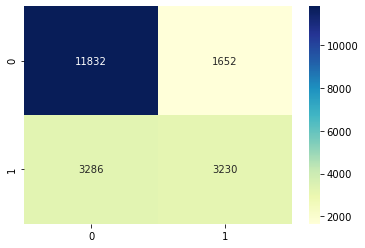

In [384]:
print(result.best_params_)
normal_lgbm = result.best_estimator_
normal_lgbm.fit(X_train,y_train)
y_pred_normal = normal_lgbm.predict(X_valid)
get_clf_eval(y_valid,y_pred_normal)

####  Threshold tuning

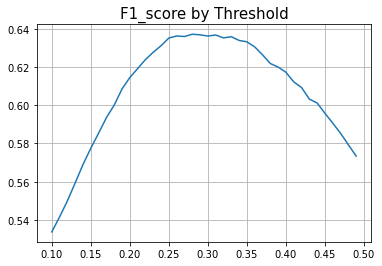

(0.2799999999999999, 0.6372223959962465)


In [250]:
Threshold_tuing(normal_lgbm)


정확도: 0.7100
정밀도: 0.5379
재현율: 0.7816
AUC: 0.7285
F1: 0.6372


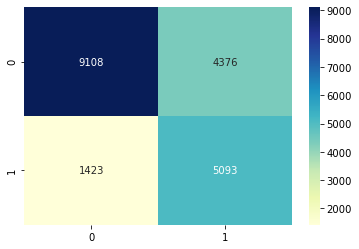

In [440]:
get_clf_eval(y_valid,y_pred_prob[:,1]>0.28)

In [251]:
with open('../lgbm_model.pkl','wb') as file:
    pickle.dump(normal_lgbm,file)

In [252]:
with open('./저장모델/lgbm_model.pkl','rb') as f:
    lgbm = pickle.load(f)

# BaggingClassifier

#### Bagging에 들어갈 Decision tree최적화

In [434]:
# bagging에 들어갈 decision tree를 최적화
des_tree = DecisionTreeClassifier()
num_features = len(overed_X.columns)
des_tree_param = {
    'criterion':['gini','entropy'],
    'max_depth':[np.round(num_features*0.5),np.round(num_features*0.7),np.round(num_features*0.9)],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,5,10]
}
grid_search = GridSearchCV(des_tree,param_grid=des_tree_param,cv=cv,n_jobs=-1,error_score=0,verbose=3,scoring='f1')
start_time = timer(None)
result = grid_search.fit(overed_X,overed_y)
timer(start_time)

Fitting 10 folds for each of 54 candidates, totalling 540 fits

 Time taken: 0 hours 2 minutes and 7.49 seconds.


{'criterion': 'gini', 'max_depth': 38.0, 'min_samples_leaf': 10, 'min_samples_split': 2}

정확도: 0.6905
정밀도: 0.5273
재현율: 0.4830
AUC: 0.6369
F1: 0.5042


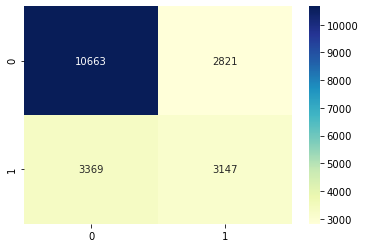

In [435]:
print(result.best_params_)
des_tree = result.best_estimator_
des_tree.fit(X_train,y_train)
y_pred_normal = des_tree.predict(X_valid)
get_clf_eval(y_valid,y_pred_normal)

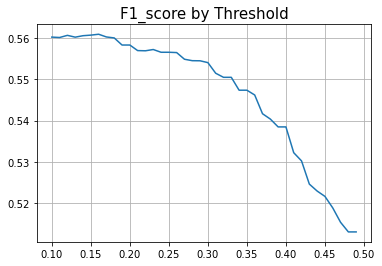

(0.15999999999999998, 0.5609961299007236)


In [254]:
Threshold_tuing(des_tree)


정확도: 0.6087
정밀도: 0.4421
재현율: 0.7675
AUC: 0.6497
F1: 0.5610


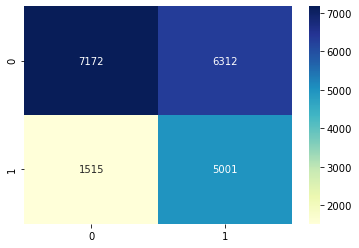

In [438]:
get_clf_eval(y_valid,y_pred_prob[:,1]>0.16)

In [446]:
with open('../des_tree.pkl','wb') as file:
    pickle.dump(des_tree,file)

In [22]:
with open('./저장모델/des_tree.pkl','rb') as f:
    des_tree = pickle.load(f)
    

#### Bagging 파라미터 최적화

In [32]:
bagging = BaggingClassifier(base_estimator=des_tree,n_jobs=-1)
bag_param = {
    'n_estimators':[10,50,100,200,300],
    'max_samples':[0.3,0.5,0.7,0.9],
    'max_features':[0.3,0.5,0.7,0.9]
}
cv=RepeatedStratifiedKFold(n_splits=5, n_repeats=2)
start_time = timer(None)
grid_search = GridSearchCV(bagging,param_grid=bag_param,cv=cv,error_score=0,scoring='f1',verbose=3)
result = grid_search.fit(overed_X,overed_y)
timer(start_time)

Fitting 10 folds for each of 80 candidates, totalling 800 fits
[CV 1/10] END max_features=0.3, max_samples=0.3, n_estimators=10;, score=0.730 total time=   1.6s
[CV 2/10] END max_features=0.3, max_samples=0.3, n_estimators=10;, score=0.752 total time=   0.6s
[CV 3/10] END max_features=0.3, max_samples=0.3, n_estimators=10;, score=0.754 total time=   0.6s
[CV 4/10] END max_features=0.3, max_samples=0.3, n_estimators=10;, score=0.733 total time=   0.7s
[CV 5/10] END max_features=0.3, max_samples=0.3, n_estimators=10;, score=0.750 total time=   0.6s
[CV 6/10] END max_features=0.3, max_samples=0.3, n_estimators=10;, score=0.731 total time=   0.6s
[CV 7/10] END max_features=0.3, max_samples=0.3, n_estimators=10;, score=0.739 total time=   0.6s
[CV 8/10] END max_features=0.3, max_samples=0.3, n_estimators=10;, score=0.716 total time=   0.6s
[CV 9/10] END max_features=0.3, max_samples=0.3, n_estimators=10;, score=0.740 total time=   0.6s
[CV 10/10] END max_features=0.3, max_samples=0.3, n_est

KeyboardInterrupt: 

{'max_features': 0.7, 'max_samples': 0.9, 'n_estimators': 300}

정확도: 0.7464
정밀도: 0.7148
재현율: 0.3688
AUC: 0.6488
F1: 0.4865


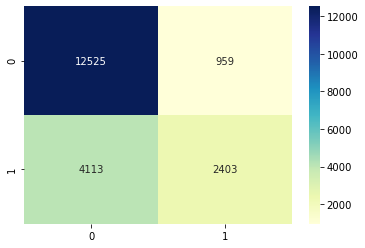

In [448]:
print(result.best_params_)
bagging = result.best_estimator_
bagging.fit(X_train,y_train)
y_pred_normal = bagging.predict(X_valid)
get_clf_eval(y_valid,y_pred_normal)

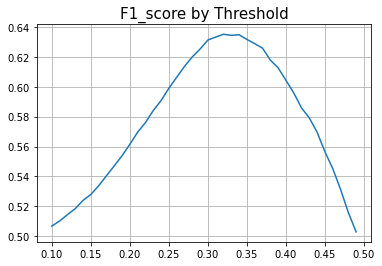

(0.3199999999999999, 0.6351893654376723)


In [253]:
Threshold_tuing(bagging)

In [450]:
with open('../bagging.pkl','wb') as file:
    pickle.dump(bagging,file)

In [23]:
with open('./저장모델/bagging.pkl','rb') as f:
    bagging = pickle.load(f)

# AdaBoostClassifier

In [16]:
adaboost = AdaBoostClassifier(base_estimator=des_tree)
ada_param = {
    'n_estimators':[50,100,200],
    'learning_rate':[0.1,0.5,1]
}
cv=RepeatedStratifiedKFold(n_splits=5, n_repeats=2)
start_time = timer(None)
grid_search = GridSearchCV(adaboost,param_grid=ada_param,cv=cv,error_score=0,scoring='f1',verbose=3)
result = grid_search.fit(overed_X,overed_y)
timer(start_time)

Fitting 10 folds for each of 9 candidates, totalling 90 fits
[CV 1/10] END learning_rate=0.1, n_estimators=50;, score=0.798 total time= 1.8min
[CV 2/10] END learning_rate=0.1, n_estimators=50;, score=0.794 total time= 1.8min
[CV 3/10] END learning_rate=0.1, n_estimators=50;, score=0.790 total time= 1.8min
[CV 4/10] END learning_rate=0.1, n_estimators=50;, score=0.797 total time= 1.7min
[CV 5/10] END learning_rate=0.1, n_estimators=50;, score=0.799 total time= 1.8min
[CV 6/10] END learning_rate=0.1, n_estimators=50;, score=0.799 total time= 1.8min
[CV 7/10] END learning_rate=0.1, n_estimators=50;, score=0.795 total time= 1.9min
[CV 8/10] END learning_rate=0.1, n_estimators=50;, score=0.801 total time= 1.7min
[CV 9/10] END learning_rate=0.1, n_estimators=50;, score=0.788 total time= 1.8min
[CV 10/10] END learning_rate=0.1, n_estimators=50;, score=0.802 total time= 1.7min
[CV 1/10] END learning_rate=0.1, n_estimators=100;, score=0.802 total time= 3.9min
[CV 2/10] END learning_rate=0.1, n_

{'learning_rate': 0.1, 'n_estimators': 200}

정확도: 0.7356
정밀도: 0.6385
재현율: 0.4340
AUC: 0.6576
F1: 0.5168


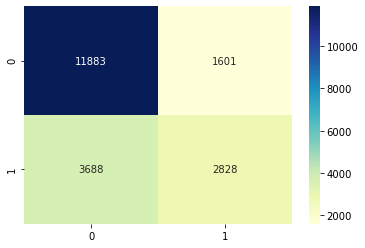

In [23]:
print(result.best_params_)
adaboost = result.best_estimator_
adaboost.fit(X_train,y_train)
y_pred_normal = adaboost.predict(X_valid)
get_clf_eval(y_valid,y_pred_normal)

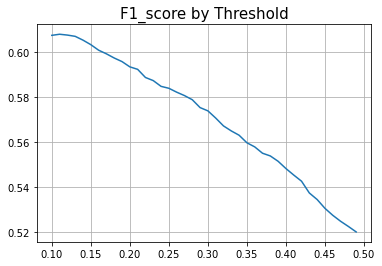

(0.11, 0.6080231996133397)


In [255]:
Threshold_tuing(Adaboost)

In [27]:
with open('./저장모델/adaboost.pkl','wb') as file:
    pickle.dump(adaboost,file)

In [24]:
with open('./저장모델/adaboost.pkl','rb') as f:
    Adaboost = pickle.load(f)

# Weighted voting

In [233]:
def weighted_voting(data,method='soft'):
    model_tensor = torch.Tensor(data.to_numpy()).cuda()
    model_score = {'xgb':.7002,'svm':.6842,'ada':.6978,'bagging':.6960,'lgbm':.6980,'mlp':.7092}
    
    # 각 모델의 예측 확률값
    xgb_proba = normed_xgb.predict_proba(data)
    svm_proba = best_svm.predict_proba(data)
    lgbm_proba = lgbm.predict_proba(data)
    bagging_proba = bagging.predict_proba(data)
    ada_proba = Adaboost.predict_proba(data)
    with torch.no_grad():
        model.eval()
        model_proba = model(model_tensor).cpu().numpy()
    if method=='soft':        
        xgb_vote = xgb_proba *np.array([-model_score['xgb'],model_score['xgb']])
        svm_vote = svm_proba *np.array([-model_score['svm'],model_score['svm']])
        lgbm_vote = lgbm_proba *np.array([-model_score['lgbm'],model_score['lgbm']])
        bagging_vote = bagging_proba *np.array([-model_score['bagging'],model_score['bagging']])
        ada_vote = ada_proba *np.array([-model_score['ada'],model_score['ada']])
        mlp_vote = model_proba *np.array([-model_score['mlp'],model_score['mlp']])
        result = np.concatenate([xgb_vote,svm_vote,lgbm_vote,bagging_vote,ada_vote,mlp_vote],axis=1)
        voted_pred = np.sum(result,axis=1)
        voted_pred = np.where(voted_pred<0,0,1)
        return voted_pred
    else:        
        # 모든 모델의 Threshold를 이용한 predict
        xgb_pred = np.array(xgb_proba[:,1]>=0.29,dtype='int64')
        svm_pred = np.array(svm_proba[:,1]>=0.33,dtype='int64')
        lgbm_pred = np.array(lgbm_proba[:,1]>=0.28,dtype='int64')
        bagging_pred = np.array(bagging_proba[:,1]>=0.32,dtype='int64')
        ada_pred = np.array(ada_proba[:,1]>=0.11,dtype='int64')
        model_pred = np.array(model_proba[:,1]>=0.3,dtype='int64')
        result = np.sum([xgb_pred,svm_pred,lgbm_pred,bagging_pred,ada_pred,model_pred],axis=0)
        voted_pred = np.where(result>=3,1,0)
        return voted_pred

# submission

In [51]:
df_test = data_normalize(pd.read_csv('./test.csv').drop(columns="ID"))
def make_submit(model,threshold=0.5):
    model_name = str(model).split('(')[0]
    submit = pd.read_csv('./sample_submission.csv')
    model_predict = model.predict_proba(df_test)
    submit['answer'] = np.array(model_predict[:,1]>=threshold,dtype='int64')
    submit.to_csv(f'./{model_name}Pred.csv',index=False)
    return

def make_mlp_sub(model,thershold=.5):
    test_tensor = torch.Tensor(df_test.to_numpy()).cuda()
    with torch.no_grad():
        model.eval()
        result = model(test_tensor)
    mlp_pred = (result[:,1]>=torch.Tensor([thershold]).cuda()).int()*1
    submit = pd.read_csv('./sample_submission.csv')
    submit['answer'] = mlp_pred.cpu()
    submit.to_csv('mlp_pred.csv',index=False)
def make_vote_submit(method='soft'):
    submit = pd.read_csv('./sample_submission.csv')
    pred = weighted_voting(df_test,method=method)
    submit['answer'] = pred
    submit.to_csv(f'{method}voted_Pred.csv',index=False)
def make_mlp2_sub(model,threshold=.5):
    test_tensor = torch.Tensor(df_test.to_numpy()).cuda()
    with torch.no_grad():
        model.cuda()
        model.eval()
        result = model(test_tensor).view(-1).cpu()
    mlp_pred = (result>=torch.Tensor([threshold])).int()*1
    submit = pd.read_csv('./sample_submission.csv')
    submit['answer'] = mlp_pred
    submit.to_csv('mlp_pred.csv',index=False)

In [95]:
make_submit(normed_xgb,0.29)
make_submit(best_svm,.33)
make_submit(lgbm,0.28)
make_submit(bagging,0.32)
make_submit(Adaboost,.11)

In [300]:
make_mlp_sub(model)

In [234]:
make_vote_submit('hard')